#### today project started date : 25th june 2025

In [14]:
import os
import cv2
import numpy as np

def resize_with_padding(img, target_size=150):
    h, w = img.shape[:2]
    scale = target_size / max(h, w)
    resized_img = cv2.resize(img, (int(w * scale), int(h * scale)))
    top = bottom = (target_size - resized_img.shape[0]) // 2
    left = right = (target_size - resized_img.shape[1]) // 2
    top += (target_size - resized_img.shape[0]) % 2
    left += (target_size - resized_img.shape[1]) % 2
    padded_img = cv2.copyMakeBorder(
        resized_img, top, bottom, left, right,
        borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0]
    )
    return padded_img

def resize_images_in_folder(input_folder, output_folder, target_size=256):
    os.makedirs(output_folder, exist_ok=True)
    for class_name in os.listdir(input_folder):
        class_path = os.path.join(input_folder, class_name)
        if not os.path.isdir(class_path):
            continue
        output_class_path = os.path.join(output_folder, class_name)
        os.makedirs(output_class_path, exist_ok=True)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Skipping unreadable file: {img_path}")
                continue

            # Convert grayscale to RGB if needed
            if len(img.shape) == 2 or img.shape[2] == 1:
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

            padded_img = resize_with_padding(img, target_size)

            output_path = os.path.join(output_class_path, img_name)
            cv2.imwrite(output_path, padded_img)

        print(f"Processed class: {class_name}")

train_input = r'/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Training_resized'
train_output =r'/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Training_150'

test_input = r'/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Testing_resized'
test_output =r'/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Testing_150'

# Run the resizing
resize_images_in_folder(train_input, train_output)
resize_images_in_folder(test_input, test_output)


Processed class: notumor
Processed class: meningioma
Processed class: glioma
Processed class: pituitary
Processed class: notumor
Processed class: meningioma
Processed class: glioma
Processed class: pituitary


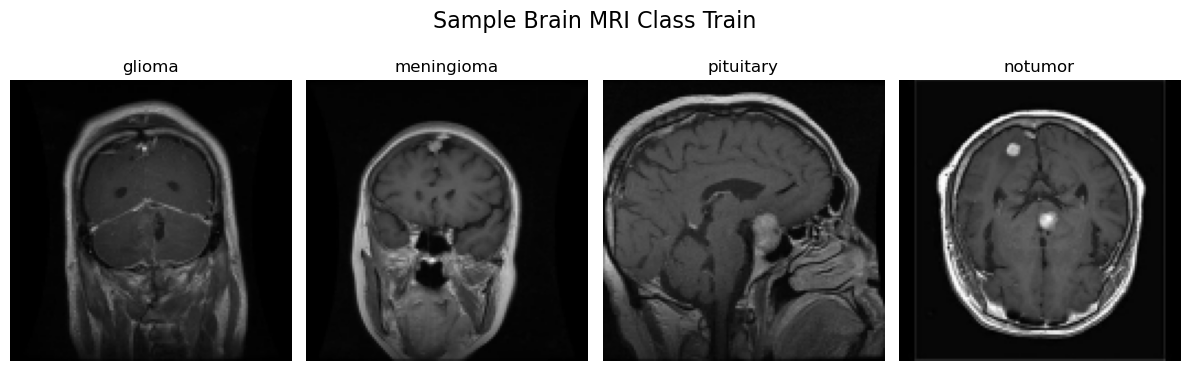

In [15]:
import os
import matplotlib.pyplot as plt
import cv2
dataset_path = r'/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Training_150'

classes = ['glioma', 'meningioma', 'pituitary', 'notumor']
img_size = 128
plt.figure(figsize=(12, 4))
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    img_files = os.listdir(class_path)
    img_path = os.path.join(class_path, img_files[0])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.suptitle("Sample Brain MRI Class Train", fontsize=16)
plt.tight_layout()
plt.show()


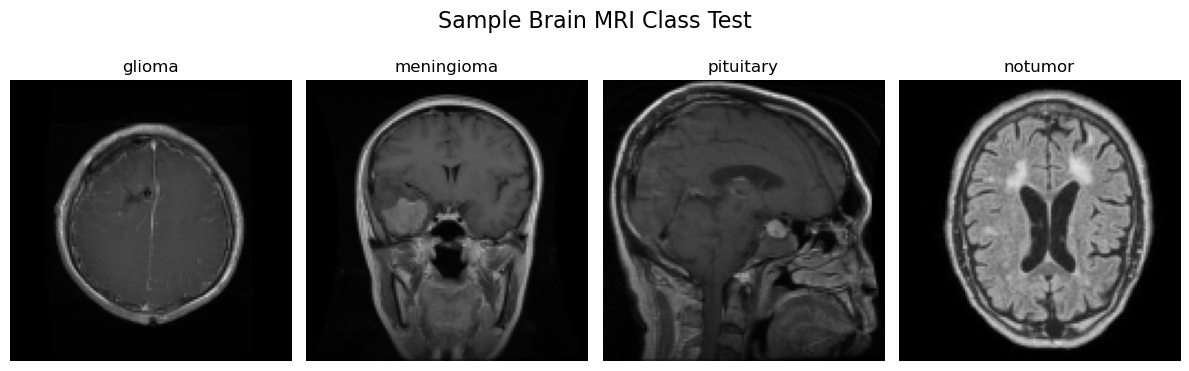

In [17]:
import os
import matplotlib.pyplot as plt
import cv2
dataset_path = r'/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Testing_150'

classes = ['glioma', 'meningioma', 'pituitary', 'notumor']
img_size = 128
plt.figure(figsize=(12, 4))
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    img_files = os.listdir(class_path)
    img_path = os.path.join(class_path, img_files[0])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.suptitle("Sample Brain MRI Class Test", fontsize=16)
plt.tight_layout()
plt.show()


In [1]:
from tensorflow.keras.applications import DenseNet121,EfficientNetB2,ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense ,Dropout, GlobalAveragePooling2D,BatchNormalization
from keras.layers import Dropout,GlobalAveragePooling2D,Conv2D,MaxPool2D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import AdamW,Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print("all libraries are uploded")


2025-07-23 08:46:32.007325: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-23 08:46:32.191366: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


all libraries are uploded


In [ ]:
# base_model = EfficientNetB2(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(224,224, 3) # i used 256,256 // and 128,128 also 
# )
# base_model.trainable = False
# print("model loaded")


model loaded


In [ ]:
# base_model = ResNet50(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(256,256,3))

# base_model.trainable = False
# print("model loaded")

model loaded


In [2]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
#nn
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation = 'softmax'))



/home/petpooja/miniconda3/envs/ds_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)             # Prevent overfitting
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.3)(x)
# predictions = Dense(4, activation='softmax')(x)


In [ ]:
# x = base_model.output
# x = GlobalAveragePooling2D()(x) 
# x = Dropout(0.5)(x)              # Regularization
# x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
# x = BatchNormalization()(x)      
# x = Dropout(0.5)(x)
# x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) # this is new added 
# x = BatchNormalization()(x)
# x = Dropout(0.3)(x)
# x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
# x = BatchNormalization()(x)
# predictions = Dense(4, activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=predictions)


In [3]:

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# model.compile(
#     optimizer=Adam(learning_rate=0.0001), 
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )
# print("Model compiled successfully")

Model compiled successfully


In [4]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r'/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Training_150',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    r'/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Testing_150',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=test_generator,
    validation_steps=len(test_generator),
    epochs=30,
    callbacks=[early_stop,reduce_lr]
)


Found 5663 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


/home/petpooja/miniconda3/envs/ds_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.3138 - loss: 1.3239 - val_accuracy: 0.2900 - val_loss: 1.4879 - learning_rate: 1.0000e-04
Epoch 2/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.5132 - loss: 1.0435 - val_accuracy: 0.3742 - val_loss: 1.2248 - learning_rate: 1.0000e-04
Epoch 3/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.5631 - loss: 0.9759 - val_accuracy: 0.3950 - val_loss: 1.2895 - learning_rate: 1.0000e-04
Epoch 4/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.6245 - loss: 0.9009 - val_accuracy: 0.5400 - val_loss: 1.1439 - learning_rate: 1.0000e-04
Epoch 5/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.6834 - loss: 0.8030 - val_accuracy: 0.5133 - val_loss: 1.2899 - learning_rate: 1.0000e-04
Epoch 6/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.6946 - loss: 0.7961 - val_accuracy: 0.5783 - val_loss: 1.1720 - learning_rate: 1.0000e-04
Epoch 7/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accur

In [6]:
model.save("tumor_model.h5")

In [7]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.8719 - loss: 0.7627
Test Accuracy: 0.8558
Test Loss: 0.8021


41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step

Classification Report:

              precision    recall  f1-score   support

      glioma       0.23      0.18      0.20       300
  meningioma       0.23      0.24      0.23       306
     notumor       0.35      0.34      0.34       405
   pituitary       0.21      0.26      0.23       300

    accuracy                           0.26      1311
   macro avg       0.26      0.25      0.25      1311
weighted avg       0.26      0.26      0.26      1311



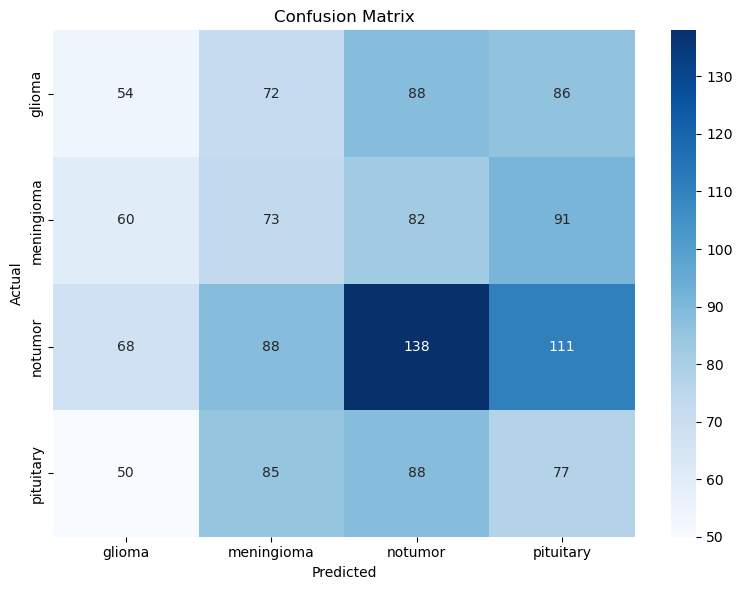

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

y_pred_probs = model.predict(test_generator, steps=len(test_generator), verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


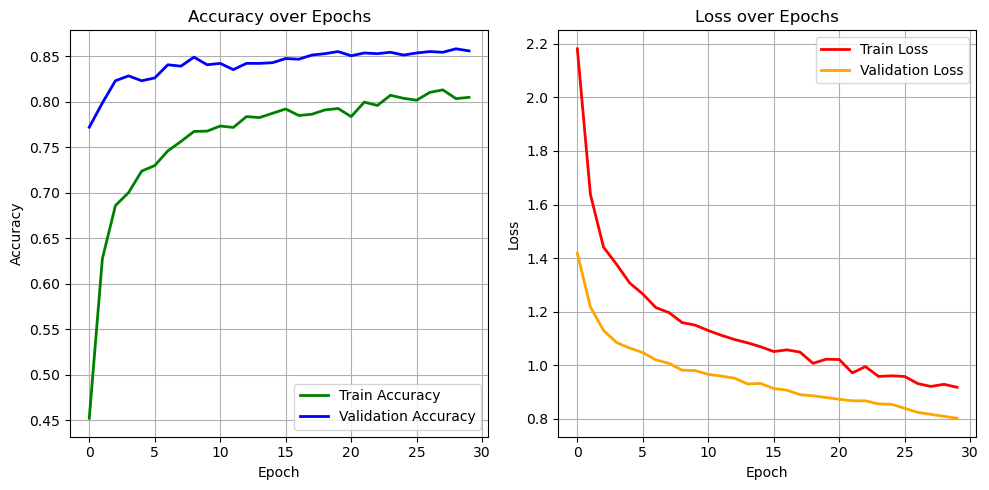

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue', linewidth=2)
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('tumor_model_80acc.h5')
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']  
img_path = input("Input image path: ")
img = image.load_img(img_path, target_size=(256,256))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize the images seze
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)[0]

print(f"Predicted Class: {class_names[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: glioma
